# Hidden Layers Activation


## Setting up Neural Network


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras import backend as K

from keras.datasets import mnist
from keras import utils
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

nb_classes = 10

In [2]:
# Set dropout rate - fractions of neurons to drop
dropout = 0.5

# Build very simple neural network with 2 hidden layers
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(784,)))
model.add(Dropout(dropout))
model.add(Dense(64, activation="relu"))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Prepate the Dataset


In [3]:
# The binary_crossentropy loss expects a one-hot-vector as input,
# so we apply the to_categorical function from keras.utils to convert integer labels to one-hot-vectors.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# Convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

# Split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5 / 6)

Visualizing example digit


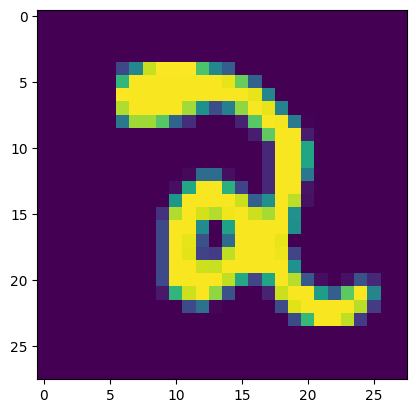

In [4]:
# Show example digit
plt.imshow(X_train[0].reshape(28, 28))

## Model Training


In [5]:
# When we have defined and compiled the model, it can be trained using the fit function.
# We also use validation dataset to monitor validation loss and accuracy.
network_history = model.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=20,
    verbose=1,
    validation_data=(X_val, Y_val),
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6491 - loss: 1.0646 - val_accuracy: 0.9374 - val_loss: 0.2193
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.3215 - val_accuracy: 0.9516 - val_loss: 0.1677
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.2534 - val_accuracy: 0.9593 - val_loss: 0.1431
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9413 - loss: 0.2078 - val_accuracy: 0.9648 - val_loss: 0.1313
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1852 - val_accuracy: 0.9674 - val_loss: 0.1237
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9501 - loss: 0.1708 - val_accuracy: 0.9688 - val_loss: 0.1150
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9569 - loss: 0.1495 - val_accuracy: 0.9706 - val_loss: 0.1112
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1384 - val_accuracy: 0.

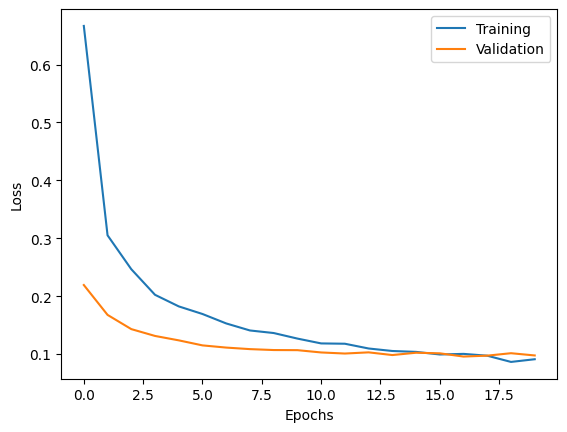

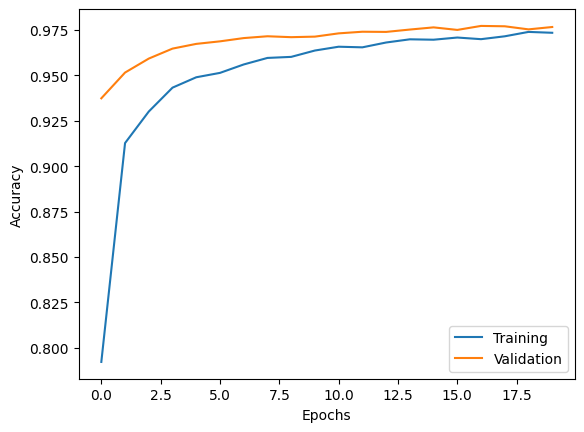

In [6]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(network_history.history["loss"])
    plt.plot(network_history.history["val_loss"])
    plt.legend(["Training", "Validation"])

    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(network_history.history["accuracy"])
    plt.plot(network_history.history["val_accuracy"])
    plt.legend(["Training", "Validation"], loc="lower right")
    plt.show()


# The fit function returns a keras.callbacks.History object which contains the entire history
# of training/validation loss, accuracy and other metrics for each epoch.
# We can therefore plot the behavior of loss and accuracy during the training phase.
plot_history(network_history)

In [7]:
import tensorflow

# Create a function that takes ONE input and returns THREE outputs
get_outputs = tensorflow.keras.Function(
    inputs=[model.layers[0].input],
    outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output],
)

# Now call with single input
layer1, layer2, layer3 = get_outputs([X_train])
train_ids = [np.arange(len(Y_train))[Y_train[:, i] == 1] for i in range(10)]

In [8]:
test_layer1_output, test_layer2_output, test_layer3_output = get_outputs([X_test])

In [9]:
# 1. Preprocess data for TriMAP
tensorflow.experimental.numpy.experimental_enable_numpy_behavior()
layer1 = np.ascontiguousarray(layer1.astype(np.float32))
layer2 = np.ascontiguousarray(layer2.astype(np.float32))
test_layer1_output = np.ascontiguousarray(test_layer1_output.astype(np.float32))
test_layer2_output = np.ascontiguousarray(test_layer2_output.astype(np.float32))

/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


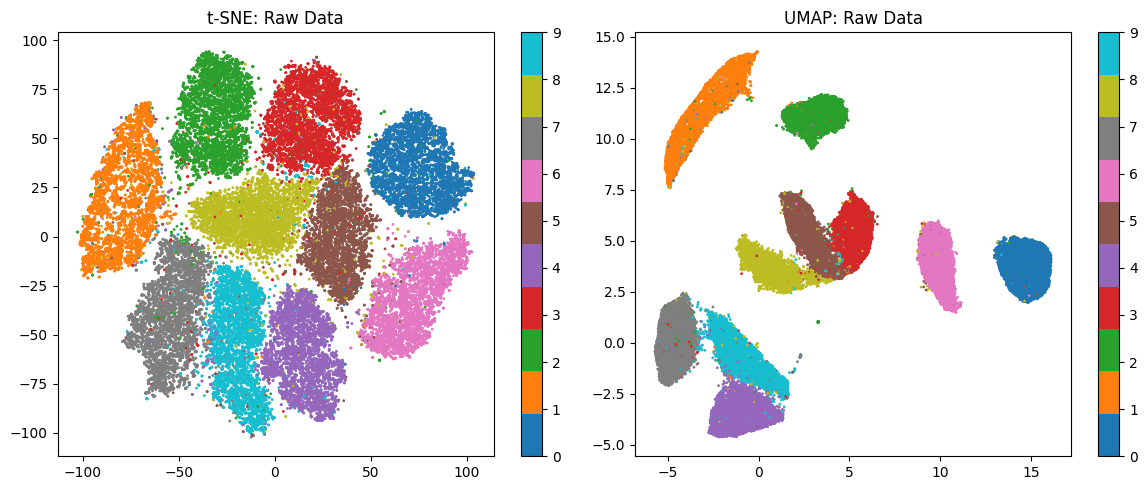

/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


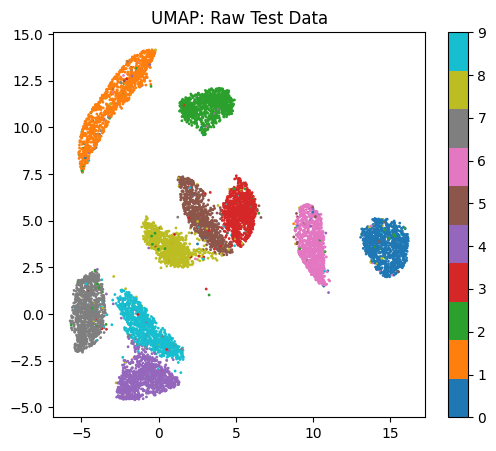

In [10]:
# Import necessary libraries
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.decomposition import PCA
from trimap import TRIMAP

# Apply t-SNE to raw training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Apply UMAP to raw training data
umap_model = UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)

# Visualize the embeddings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    X_train_tsne[:, 0],
    X_train_tsne[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("t-SNE: Raw Data")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(
    X_train_umap[:, 0],
    X_train_umap[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("UMAP: Raw Data")
plt.colorbar()
plt.tight_layout()
plt.show()

X_test_umap = umap_model.transform(X_test)
plt.figure(figsize=(6, 5))
plt.scatter(
    X_test_umap[:, 0], X_test_umap[:, 1], c=np.argmax(Y_test, axis=1), cmap="tab10", s=1
)
plt.title("UMAP: Raw Test Data")
plt.colorbar()
plt.show()

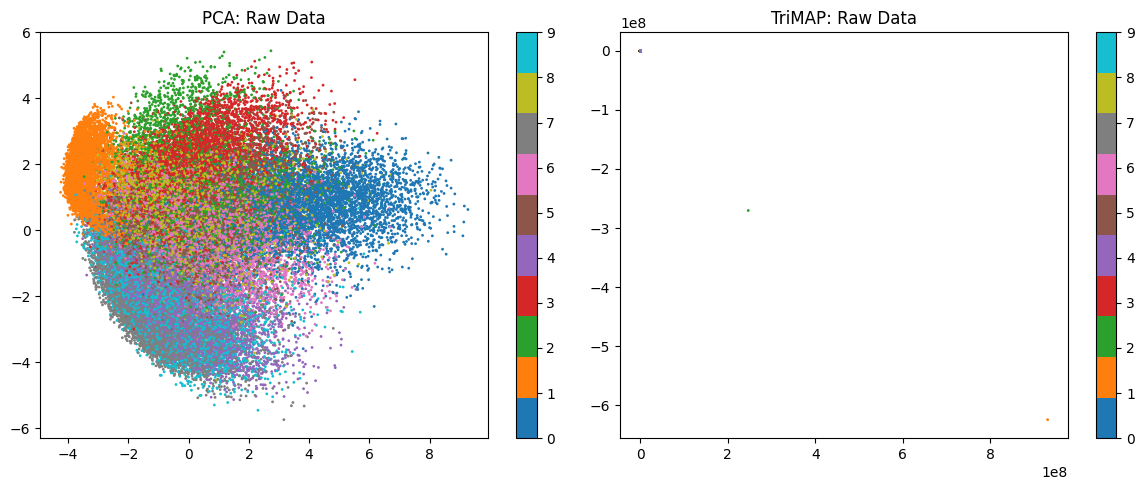

In [11]:
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)

TriMAP_model = TRIMAP()
X_train_trimap = TriMAP_model.fit_transform(X_train)

# Visualize the embeddings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("PCA: Raw Data")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(
    X_train_trimap[:, 0],
    X_train_trimap[:, 1],
    c=np.argmax(Y_train, axis=1),
    cmap="tab10",
    s=1,
)
plt.title("TriMAP: Raw Data")
plt.colorbar()
plt.tight_layout()
plt.show()

In [12]:
def visualize_layers(
    layer1_train_embedding,
    layer1_test_embedding,
    layer2_train_embedding,
    layer2_test_embedding,
    method,
    y_train=Y_train,
    y_test=Y_test,
):
    # Visualize the embeddings
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 2, 1)
    plt.scatter(
        layer1_train_embedding[:, 0],
        layer1_train_embedding[:, 1],
        c=np.argmax(y_train, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: First layer training embedding")
    plt.colorbar()

    plt.subplot(2, 2, 2)
    plt.scatter(
        layer2_train_embedding[:, 0],
        layer2_train_embedding[:, 1],
        c=np.argmax(y_train, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: Second layer training embedding")
    plt.colorbar()

    plt.subplot(2, 2, 3)
    plt.scatter(
        layer1_test_embedding[:, 0],
        layer1_test_embedding[:, 1],
        c=np.argmax(y_test, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: First layer test embedding")
    plt.colorbar()

    plt.subplot(2, 2, 4)
    plt.scatter(
        layer2_test_embedding[:, 0],
        layer2_test_embedding[:, 1],
        c=np.argmax(y_test, axis=1),
        cmap="tab10",
        s=1,
    )
    plt.title(f"{method}: Second layer test embedding")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

In [13]:
methods = {"PCA": {"method": PCA}, "t-SNE": {"method": TSNE}, "UMAP": {"method": UMAP}}

In [15]:
for method, config in methods.items():
    first_layer_model = config["method"]()
    second_layer_model = config["method"]()

    layer1_train_embedding = first_layer_model.fit_transform(layer1)
    layer2_train_embedding = second_layer_model.fit_transform(layer2)

    if method == "t-SNE" or method == "TriMAP":
        layer1_test_embedding = first_layer_model.fit_transform(test_layer1_output)
        layer2_test_embedding = second_layer_model.fit_transform(test_layer2_output)
    else:
        layer1_test_embedding = first_layer_model.transform(test_layer1_output)
        layer2_test_embedding = second_layer_model.transform(test_layer2_output)

    config["layer1_train_embedding"] = layer1_train_embedding
    config["layer1_test_embedding"] = layer1_test_embedding
    config["layer2_train_embedding"] = layer2_train_embedding
    config["layer2_test_embedding"] = layer2_test_embedding


/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nicolas/studia/I_sem/wdzd/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


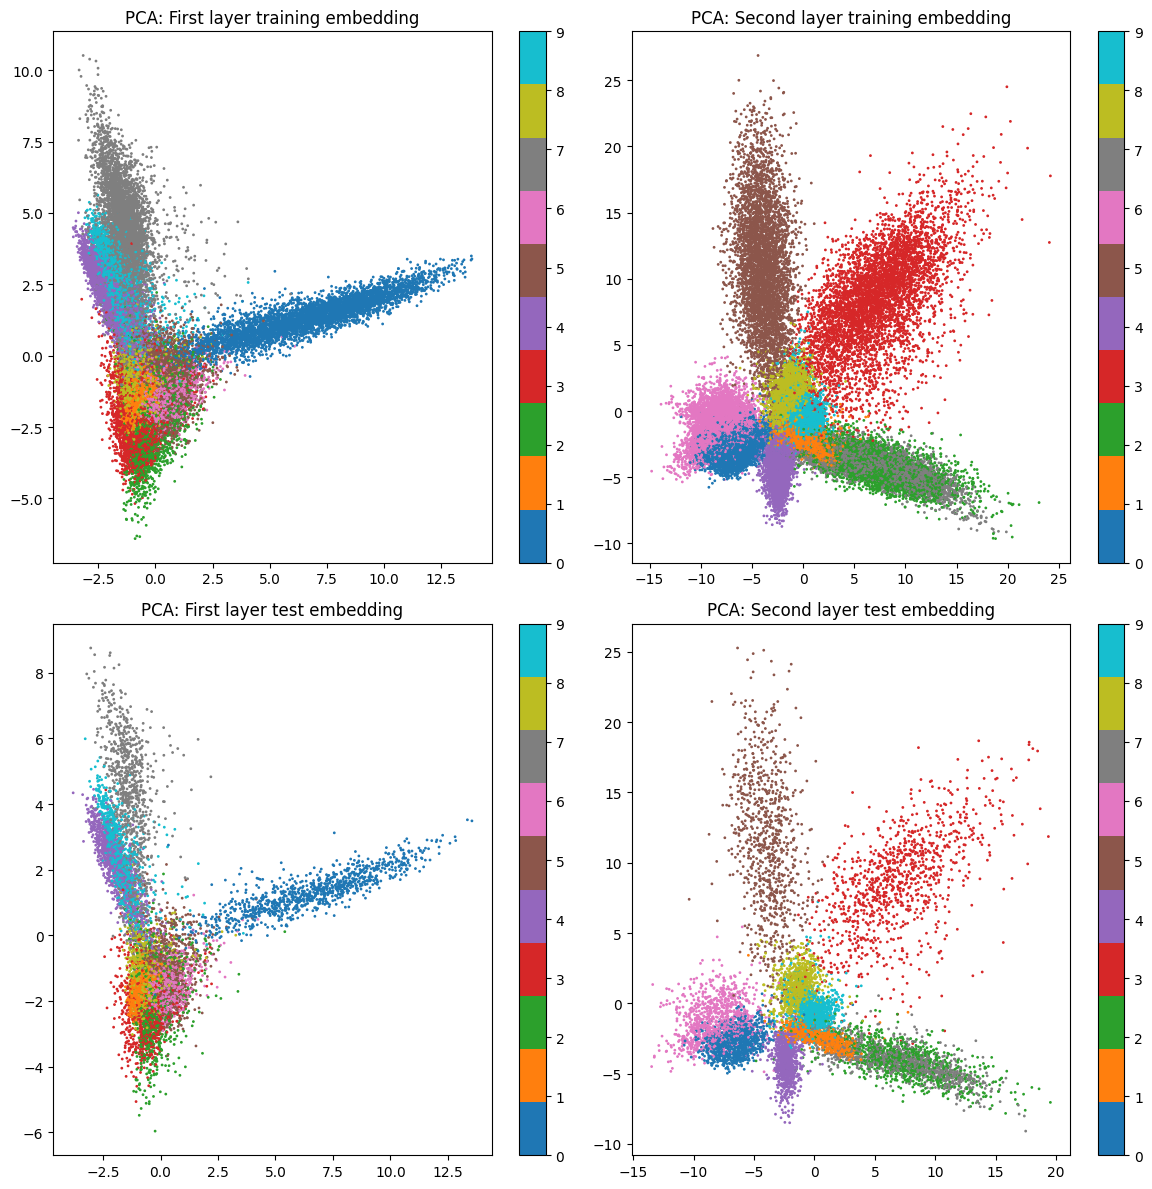

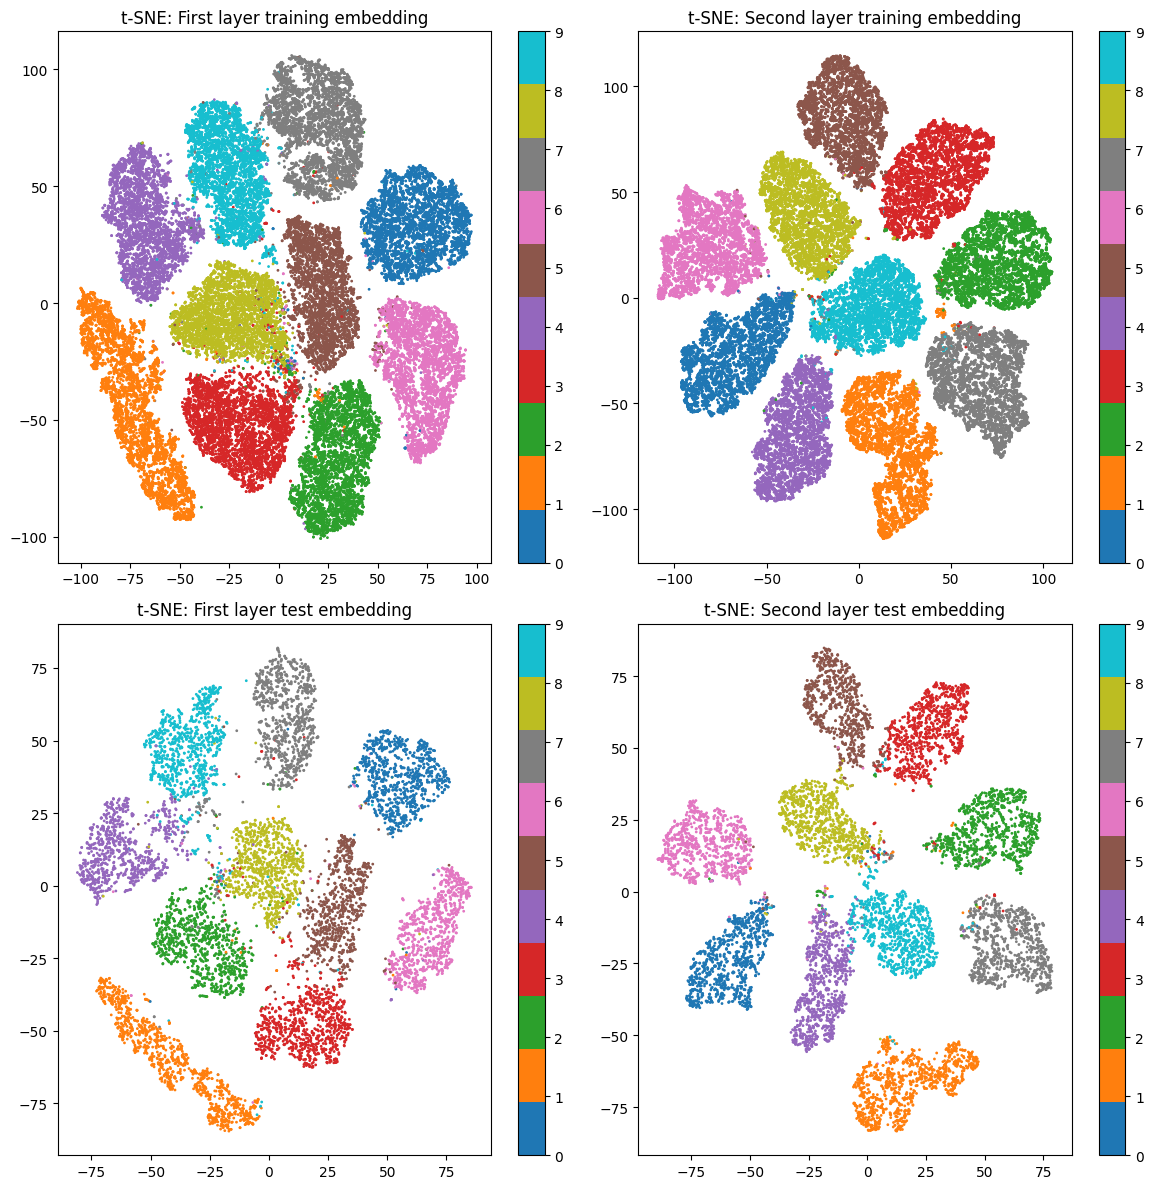

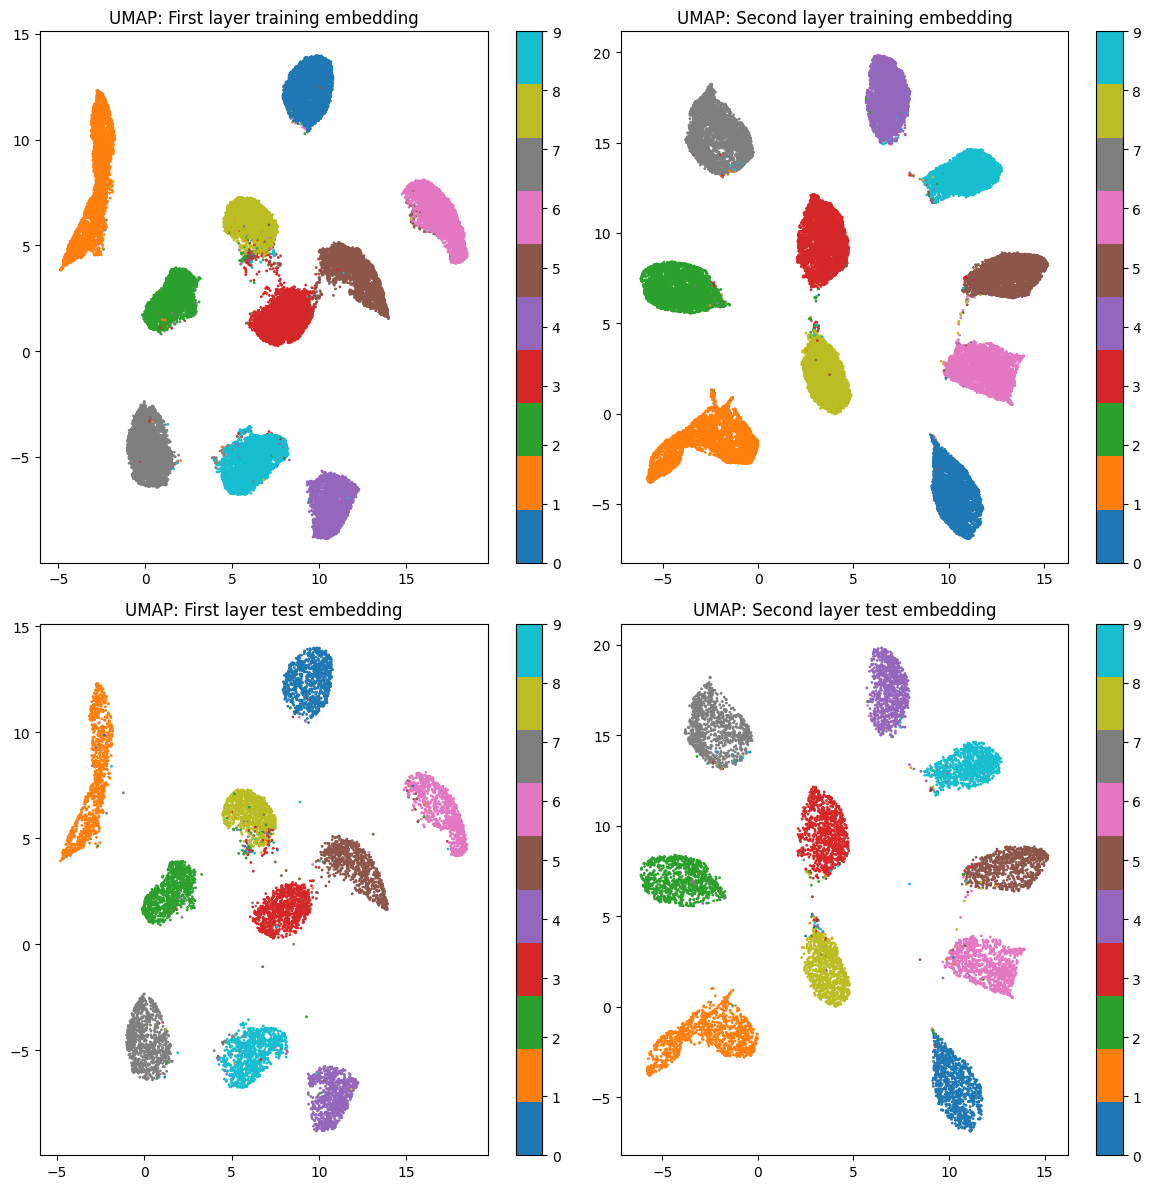

In [16]:
for method, config in methods.items():
    layer1_train_embedding = config["layer1_train_embedding"]
    layer1_test_embedding = config["layer1_test_embedding"]
    layer2_train_embedding = config["layer2_train_embedding"]
    layer2_test_embedding = config["layer2_test_embedding"]
    visualize_layers(layer1_train_embedding, layer1_test_embedding, layer2_train_embedding, layer2_test_embedding, method)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
# Define a function to evaluate KNN on different embeddings
def evaluate_knn(X_train_embedded, X_test_embedded, y_train, y_test, n_neighbors_list):
    results = []
    for n_neighbors in n_neighbors_list:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_embedded, y_train)
        y_pred = knn.predict(X_test_embedded)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((n_neighbors, accuracy))
        print(f"n_neighbors={n_neighbors}, Accuracy: {accuracy:.4f}")
    return results
 
# Convert Y_train and Y_test to class labels
y_train = np.argmax(Y_train, axis=1)
y_test = np.argmax(Y_test, axis=1)
 
# Test KNN with different numbers of neighbors
n_neighbors_list = [3, 5, 10]
 
print("Raw Data UMAP Embeddings:")
raw_results = evaluate_knn(X_train_umap, X_test_umap, y_train, y_test, n_neighbors_list)
 
# Repeat for hidden layer 1 and hidden layer 2 embeddings

Raw Data UMAP Embeddings:
n_neighbors=3, Accuracy: 0.9488
n_neighbors=5, Accuracy: 0.9518
n_neighbors=10, Accuracy: 0.9526


In [19]:
inputs = ["Raw Data", "First Hidden Layer", "Second Hidden Layer"]
X_test_pca = pca.transform(X_test)
X_test_tsne = pca.fit_transform(X_test)

for method, config in methods.items():
    if method == "PCA":
        config["train_raw"] = X_train_pca
        config["test_raw"] = X_test_pca
    elif method == 't-SNE':
        config["train_raw"] = X_train_tsne
        config["test_raw"] = X_test_tsne
    elif method == 'UMAP':
        config["train_raw"] = X_train_umap
        config["test_raw"] = X_test_umap

In [21]:
for method,config in methods.items():
    for input in inputs:
        print(f"\n{input} {method} Embedding")
        
        if input == 'Raw Data':
            X_train_embedded = config['train_raw'] 
            X_test_embedded =  config['test_raw']
        elif input == 'First Hidden Layer':    
            X_train_embedded = config['layer1_train_embedding'] 
            X_test_embedded =  config['layer1_test_embedding']
        else:
            X_train_embedded = config['layer2_train_embedding'] 
            X_test_embedded =  config['layer2_test_embedding']
        
        evaluate_knn(X_train_embedded, X_test_embedded, y_train, y_test, n_neighbors_list)


Raw Data PCA Embedding
n_neighbors=3, Accuracy: 0.4103
n_neighbors=5, Accuracy: 0.4295
n_neighbors=10, Accuracy: 0.4448

First Hidden Layer PCA Embedding
n_neighbors=3, Accuracy: 0.9759
n_neighbors=5, Accuracy: 0.9762
n_neighbors=10, Accuracy: 0.9738

Second Hidden Layer PCA Embedding
n_neighbors=3, Accuracy: 0.9777
n_neighbors=5, Accuracy: 0.9775
n_neighbors=10, Accuracy: 0.9784

Raw Data t-SNE Embedding
n_neighbors=3, Accuracy: 0.0974
n_neighbors=5, Accuracy: 0.0974
n_neighbors=10, Accuracy: 0.0974

First Hidden Layer t-SNE Embedding
n_neighbors=3, Accuracy: 0.6233
n_neighbors=5, Accuracy: 0.6266
n_neighbors=10, Accuracy: 0.6289

Second Hidden Layer t-SNE Embedding
n_neighbors=3, Accuracy: 0.8512
n_neighbors=5, Accuracy: 0.8537
n_neighbors=10, Accuracy: 0.8604

Raw Data UMAP Embedding
n_neighbors=3, Accuracy: 0.9488
n_neighbors=5, Accuracy: 0.9518
n_neighbors=10, Accuracy: 0.9526

First Hidden Layer UMAP Embedding
n_neighbors=3, Accuracy: 0.9671
n_neighbors=5, Accuracy: 0.9693
n_nei

The visualization of hidden layer activations shows better clustering compared to raw data visualization. <br>
The second hidden layer activations generally show clearer class separation than the first hidden layer.<br>
Classification accuracy generally improves when using hidden layer activations compared to raw data, with the later layer typically providing better performance.
